In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from scipy.stats import norm

In [0]:
for dirname, _, filenames in os.walk(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest2.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt


In [0]:
#df= pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt')
df_test_2 = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest2.txt',  header=0, parse_dates=True, squeeze=True)

In [0]:
df_test_2.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [0]:
df_test_2.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [0]:
df_test_2.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [0]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [0]:
df_test_2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [0]:
df_test_2.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

**TEMPERATURE**

Text(0.5, 1.0, 'Temperature')

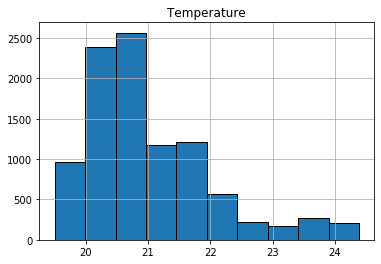

In [0]:
df_test_2['Temperature'].hist(bins=10, edgecolor='black')
plt.title('Temperature')
plt.show()

In [0]:
Temperature = df_test_2['Temperature'].copy()
Temperature.describe()

count    9752.000000
mean       21.001768
std         1.020693
min        19.500000
25%        20.290000
50%        20.790000
75%        21.533333
max        24.390000
Name: Temperature, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_2['Temperature']//0.5*0.5, df_test_2['Occupancy'])
x_default

Occupancy,0,1
Temperature,,
19.5,965,0
20.0,2389,1
20.5,2480,91
21.0,879,312
21.5,396,855
22.0,129,385
22.5,142,86
23.0,62,118
23.5,125,174


Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

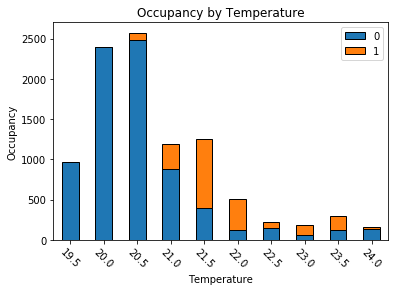

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Temperature', edgecolor='black')
pclass_xt = pd.crosstab(df_test_2['Temperature'], df_test_2['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Temperature')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY**

Text(0.5, 1.0, 'Humidity')

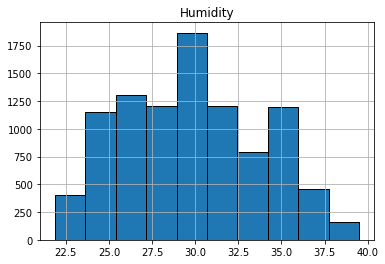

In [0]:
df_test_2['Humidity'].hist(bins=10, edgecolor='black')
plt.title('Humidity')
plt.show()

In [0]:
Humidity = df_test_2['Humidity'].copy()
Humidity.describe()

count    9752.000000
mean       29.891910
std         3.952844
min        21.865000
25%        26.642083
50%        30.200000
75%        32.700000
max        39.500000
Name: Humidity, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_2['Humidity']//2*2, df_test_2['Occupancy'])
x_default

Occupancy,0,1
Humidity,,
20.0,7,0
22.0,388,97
24.0,1196,315
26.0,1038,290
28.0,874,474
30.0,1642,422
32.0,830,213
34.0,1111,238
36.0,470,0


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

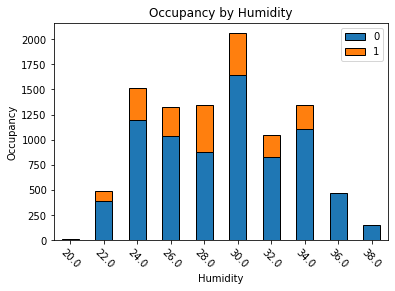

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Humidity', edgecolor='black')
pclass_xt = pd.crosstab(df_test_2['Humidity'], df_test_2['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
x_default_norm = x_default.div(x_default.sum(1).astype(float), axis=0)
x_default_norm

Occupancy,0,1
Humidity,,
20.0,1.000000,0.000000
22.0,0.800000,0.200000
24.0,0.791529,0.208471
26.0,0.781627,0.218373
28.0,0.648368,0.351632
30.0,0.795543,0.204457
32.0,0.795781,0.204219
34.0,0.823573,0.176427
36.0,1.000000,0.000000


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

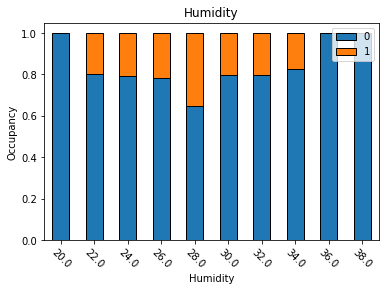

In [0]:
x_default_norm.plot(kind='bar', stacked=True, title='Humidity', edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**LIGHT**

Text(0.5, 1.0, 'Light')

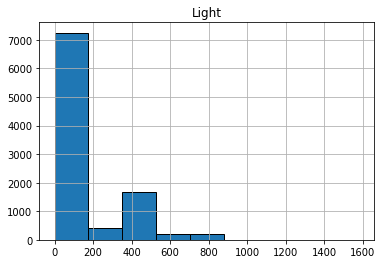

In [0]:
df_test_2['Light'].hist(bins=9, edgecolor='black')
plt.title('Light')
plt.show()

In [0]:
Light = df_test_2['Light'].copy()
Light.describe()

count    9752.000000
mean      123.067930
std       208.221275
min         0.000000
25%         0.000000
50%         0.000000
75%       208.250000
max      1581.000000
Name: Light, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_2['Light']//150*150, df_test_2['Occupancy'])
x_default

Occupancy,0,1
Light,,
0.0,7217,3
150.0,359,6
300.0,100,1074
450.0,11,664
600.0,16,147
750.0,0,151
900.0,0,2
1350.0,0,1
1500.0,0,1


Text(0.5, 0, 'Light')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

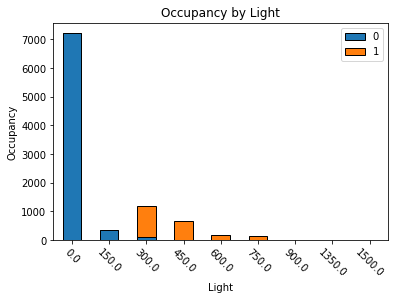

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Light', edgecolor='black')
pclass_xt = pd.crosstab(df_test_2['Light'], df_test_2['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Light')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**CO2**

Text(0.5, 1.0, 'CO2')

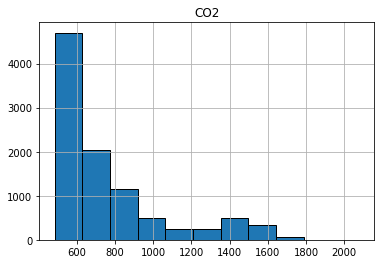

In [0]:
df_test_2['CO2'].hist(bins=11, edgecolor='black')
plt.title('CO2')
plt.show()

In [0]:
CO2 = df_test_2['CO2'].copy()
CO2.describe()

count    9752.000000
mean      753.224832
std       297.096114
min       484.666667
25%       542.312500
50%       639.000000
75%       831.125000
max      2076.500000
Name: CO2, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_2['CO2']//150*150, df_test_2['Occupancy'])
x_default

Occupancy,0,1
CO2,,
450.0,3952,320
600.0,1922,358
750.0,840,374
900.0,53,543
1050.0,78,165
1200.0,171,83
1350.0,376,126
1500.0,278,53
1650.0,28,24


Text(0.5, 0, 'CO2')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

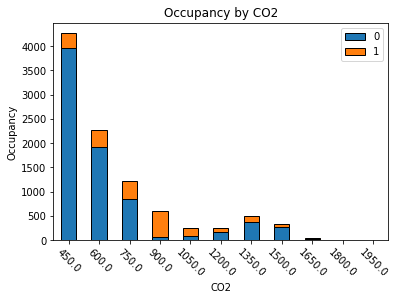

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by CO2', edgecolor='black')
pclass_xt = pd.crosstab(df_test_2['CO2'], df_test_2['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('CO2')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY RATIO**

Text(0.5, 1.0, 'HumidityRatio')

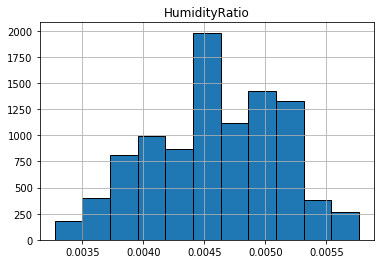

In [0]:
df_test_2['HumidityRatio'].hist(bins=11, edgecolor='black')
plt.title('HumidityRatio')
plt.show()

In [0]:
HumidityRatio = df_test_2['HumidityRatio'].copy()
HumidityRatio.describe()

count    9752.000000
mean        0.004589
std         0.000531
min         0.003275
25%         0.004196
50%         0.004593
75%         0.004998
max         0.005769
Name: HumidityRatio, dtype: float64

In [0]:
x_default = pd.crosstab(df_test_2['HumidityRatio']//0.00025*0.00025, df_test_2['Occupancy'])
x_default

Occupancy,0,1
HumidityRatio,,
0.00325,164,19
0.00350,455,14
0.00375,919,35
0.00400,853,168
0.00425,1141,373
0.00450,1367,396
0.00475,955,474
0.00500,1226,249
0.00525,554,87


Text(0.5, 0, 'HumidityRatio')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

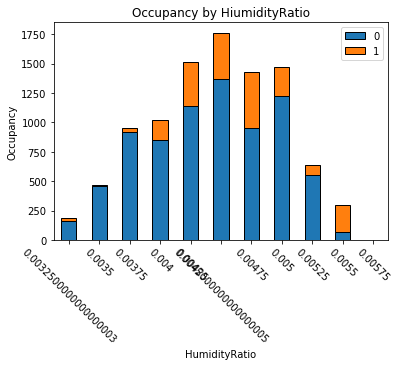

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by HiumidityRatio', edgecolor='black')
pclass_xt = pd.crosstab(df_test_2['HumidityRatio'], df_test_2['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('HumidityRatio')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**OCCUPANCY**

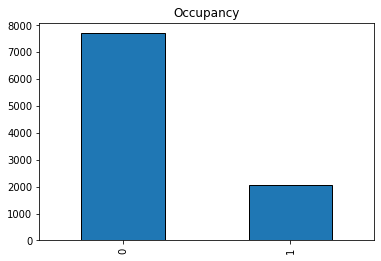

In [0]:
df_test_2['Occupancy'].value_counts().plot(kind='bar', title='Occupancy', edgecolor='black')
plt.show();

 **Project Task 1 - Basic Classifiers and Evaluation**

1. Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.


2. Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.


3. Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.


4. Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.


5. Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).


6. Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.


7. Draw your conclusions about the basic classifiers and techniques adopted in this analysis.

**COVARIANCE and CORRELATION**

In [0]:
df_test_2.cov()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.041815,-1.908068,149.948058,60.541307,-5.640403e-06,0.216971
Humidity,-1.908068,15.624974,-154.306035,-93.038196,1.855644e-03,-0.141343
Light,149.948058,-154.306035,43356.099411,11766.880081,1.798636e-02,77.580070
CO2,60.541307,-93.038196,11766.880081,88266.100723,6.814509e-03,31.701214
HumidityRatio,-0.000006,0.001856,0.017986,0.006815,2.819447e-07,0.000041
Occupancy,0.216971,-0.141343,77.580070,31.701214,4.113697e-05,0.165981


In [0]:
df_corr = df_test_2.copy()

In [0]:
df_corr.corr(method='pearson')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.472921,0.705538,0.199646,-0.010407,0.521767
Humidity,-0.472921,1.000000,-0.187477,-0.079224,0.884104,-0.087768
Light,0.705538,-0.187477,1.000000,0.190213,0.162681,0.914525
CO2,0.199646,-0.079224,0.190213,1.000000,0.043197,0.261908
HumidityRatio,-0.010407,0.884104,0.162681,0.043197,1.000000,0.190161
Occupancy,0.521767,-0.087768,0.914525,0.261908,0.190161,1.000000


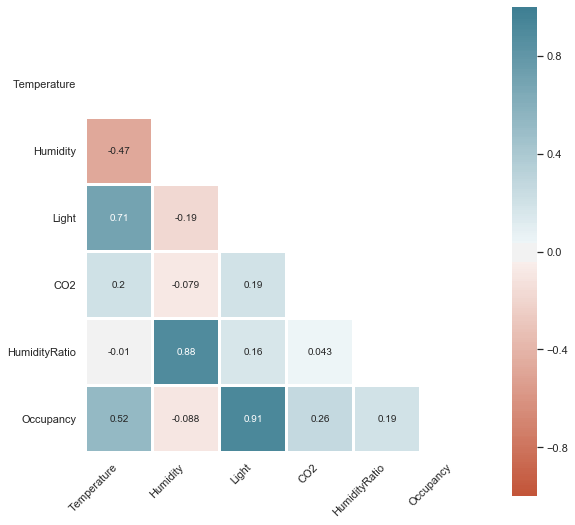

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='pearson')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [0]:
df_corr.corr(method='spearman')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.480195,0.667355,0.427670,-0.091236,0.564028
Humidity,-0.480195,1.000000,-0.097576,-0.271789,0.894230,-0.082791
Light,0.667355,-0.097576,1.000000,0.248887,0.237220,0.799477
CO2,0.427670,-0.271789,0.248887,1.000000,-0.179769,0.363826
HumidityRatio,-0.091236,0.894230,0.237220,-0.179769,1.000000,0.164846
Occupancy,0.564028,-0.082791,0.799477,0.363826,0.164846,1.000000


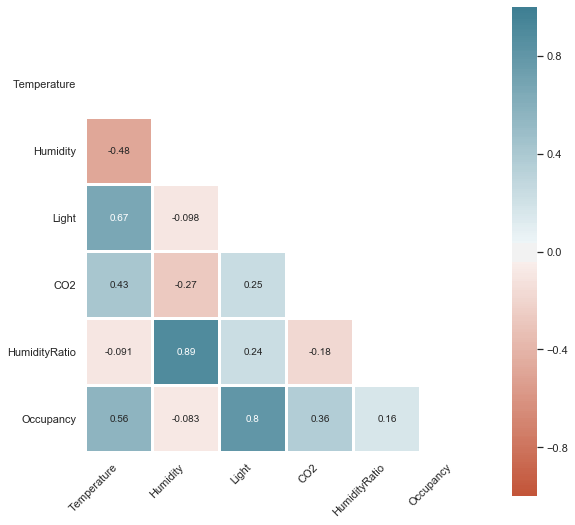

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='spearman')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');